## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility


In [2]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading datasets/coinmarketcap_06122017.csv into pandas
df = pd.read_csv('coinmarketcap_06122017.csv')
df.head(3)

# Selecting the 'id' and the 'market_cap_usd' columns
df1 = df[['id','market_cap_usd']]
print(df1)

# Counting the number of values
print(df1.count())
#print(df.count())

print('count of given columns is:',df1['id'].count(),df1['market_cap_usd'].count())

# ... YOUR CODE FOR TASK 2 ...

                     id  market_cap_usd
0               bitcoin    2.130493e+11
1              ethereum    4.352945e+10
2          bitcoin-cash    2.529585e+10
3                  iota    1.475225e+10
4                ripple    9.365343e+09
...                 ...             ...
1321          turbocoin             NaN
1322              birds             NaN
1323  bitcoincashscrypt             NaN
1324          swisscoin             NaN
1325          faceblock             NaN

[1326 rows x 2 columns]
id                1326
market_cap_usd    1031
dtype: int64
count of given columns is: 1326 1031


In [3]:
# Filtering out rows without a market capitalization
df1.dropna(inplace = True)
# Counting the number of values again
print(df1.count())

# ... YOUR CODE FOR TASK 3 ...

id                1031
market_cap_usd    1031
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


              market_cap_usd
id                          
bitcoin         2.130493e+11
ethereum        4.352945e+10
bitcoin-cash    2.529585e+10
iota            1.475225e+10
ripple          9.365343e+09
dash            5.794076e+09
litecoin        5.634498e+09
bitcoin-gold    4.920065e+09
monero          4.331688e+09
cardano         3.231420e+09
              market_cap_usd  market_cap_perc
id                                           
bitcoin         2.130493e+11        64.579199
ethereum        4.352945e+10        13.194580
bitcoin-cash    2.529585e+10         7.667641
iota            1.475225e+10         4.471679
ripple          9.365343e+09         2.838809
dash            5.794076e+09         1.756291
litecoin        5.634498e+09         1.707920
bitcoin-gold    4.920065e+09         1.491363
monero          4.331688e+09         1.313015
cardano         3.231420e+09         0.979503
              market_cap_usd  market_cap_perc  market_cap_perc1
id                                  

Text(0, 0.5, '% of total cap')

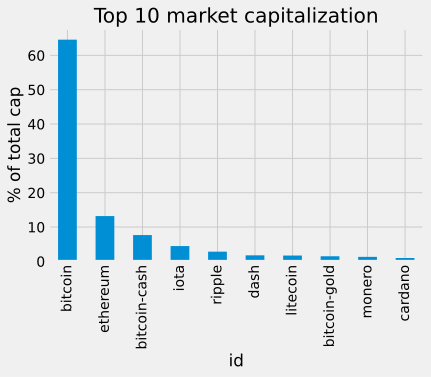

In [53]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
df2 = df1[0:10]
df2 = df2.set_index('id') 
print(df2)


# Calculating market_cap_perc
#Method 1
df_sum = df2['market_cap_usd'].sum()

df_perc = []

for i in df2['market_cap_usd']:
  j = ((i*100)/df_sum)
  df_perc.append(j)

df2['market_cap_perc'] = df_perc

print(df2)

#Method 2:

df2 = df2.assign(market_cap_perc1 = lambda x : df2['market_cap_usd'] * 100/df2['market_cap_usd'].sum() )
print(df2)

# Plotting the barplot with the title defined above 

# plt.bar(df2.index,df2['market_cap_perc'])
# plt.show()

ax = df2.market_cap_perc.plot.bar(title = TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)
# ... YOUR CODE FOR TASK 4 ...


Text(0.5, 0, '')

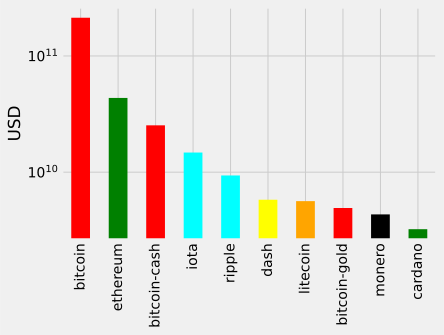

In [5]:
# Colors for the bar plot

colors = ['red','green','red','cyan','cyan','yellow','orange','red','black','green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  

ax = df2.market_cap_usd.plot.bar(color = colors,logy=True)

# Annotating the y axis with 'USD'
ax.set_ylabel('USD')
# ... YOUR CODE FOR TASK 5 ...

# Final touch! Removing the xlabel as it is not very informative
ax.xaxis.set_label_text('')

# ... YOUR CODE FOR TASK 5 ...


In [6]:
# Selecting the id, percent_change_24h and percent_change_7d columns

df3 = df[['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows

df3 = df3.set_index('id')
df3.dropna(inplace = True)

# Sorting the DataFrame by percent_change_24h in ascending order

df3.sort_values(by = ['percent_change_24h'],inplace = True)
# Checking the first few rows

df3.head(5)
# ... YOUR CODE FOR TASK 6 ...

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f270df9a210>)

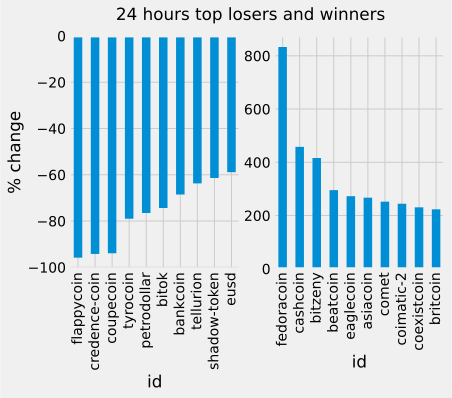

In [7]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig,axes = plt.subplots(1,2)

    
    # Plotting with pandas the barchart for the top 10 losers
    #ax1.bar(df3.index[0:10],volatility_series[0:10])
    ax = volatility_series[0:10].plot.bar( ax=axes[0])

    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')

    # Same as above, but for the top 10 winners
  #  ax2.bar(df3.index[-10:],volatility_series[-10:])
    ax = volatility_series[-1:-11: -1].plot.bar( ax=axes[1])

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
top10_subplot(df3['percent_change_24h'],DTITLE)

               percent_change_24h  percent_change_7d
id                                                  
royalties                   -9.06             -99.59
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
cagecoin                   -36.26             -92.68
tyrocoin                   -79.02             -87.43
...                           ...                ...
yoyow                      119.59             547.12
comet                      252.07             560.46
btcmoon                    -34.70             582.11
bitcoin-red                -29.87             693.37
bitzeny                    416.04            3360.71

[1239 rows x 2 columns]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f270deb3610>)

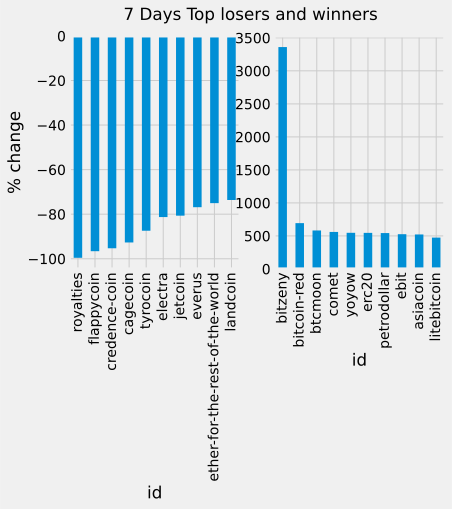

In [8]:
# Sorting in ascending order
df3.sort_values(by = ['percent_change_7d'],inplace = True)
print(df3)
# Calling the top10_subplot function
top10_subplot(df3['percent_change_7d'],'7 Days Top losers and winners')

In [9]:
# Selecting everything bigger than 10 billion 
df4 = df2[df2['market_cap_usd']>10000000000]
print(df4)
# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...


              market_cap_usd  market_cap_perc
id                                           
bitcoin         2.130493e+11        64.579199
ethereum        4.352945e+10        13.194580
bitcoin-cash    2.529585e+10         7.667641
iota            1.475225e+10         4.471679


5
2
3
[5, 2, 3]


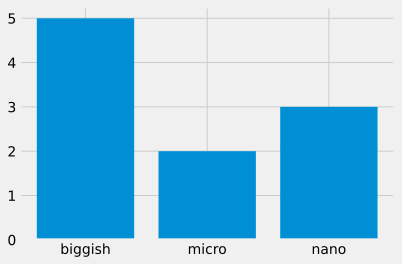

In [51]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def cap_count():
  x = df2[df2['market_cap_perc'] <= 2 ]['market_cap_perc'].count()
  y = df2[(df2['market_cap_perc'] > 2) & (df2['market_cap_perc'] < 7 )]['market_cap_perc'].count()
  z = df2[df2['market_cap_perc'] >= 7 ]['market_cap_perc'].count()
  print(x)
  print(y)
  print(z)

  return x,y,z

x,y,z = cap_count() 


# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos

# Same as above for micro ...

# ... and for nano


# Making a list with the 3 counts

cap_count_list = [x,y,z]

print(cap_count_list)

# Plotting them with matplotlib 

plt.bar(LABELS,cap_count_list)
plt.show()
# ... YOUR CODE FOR TASK 10 ...
